In [1]:
import seaborn as sns
from cogmod import cpt
from chase.base import *
from chase.utils import *
from chase.fit import *

FIGDEST = '/Users/markant/Dropbox/sharelatex/ssDFE/ssDFEpsychrev_v0/figures/'

def expected_value(opt):
    return np.dot(opt[:,0], opt[:,1])

In [19]:
mu = 10
sigma = 5
alpha = 1
np.exp(mu * alpha) * np.exp(.5 * (sigma**2) * (alpha**2) )

5910522063.0232916

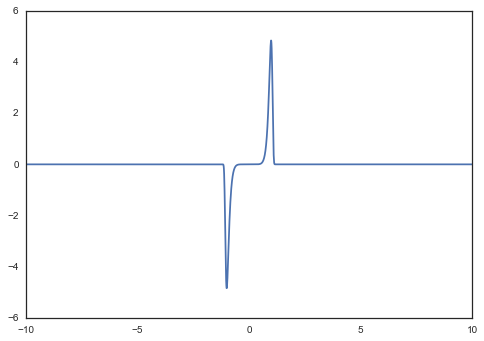

In [14]:
alpha = .1
x = np.arange(-10,10,.01)
p = (2/(alpha*np.sqrt(2*np.pi))) * (x**((1./alpha)-1)) * np.exp(-.5 * (x**(2./alpha)))
plt.plot(x, p)

In [7]:

np.exp(-.5 * (x**(2./alpha)))

0.60653065971263342

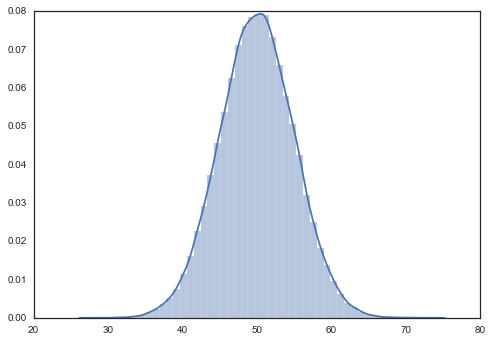

In [135]:
from scipy.stats import norm
mu = 50
sd = 5
dist = norm(mu, sd)
x = dist.rvs(size=100000)
sns.distplot(x)

In [ ]:
[[ 48.   12.5]
 [ 62.   12.5]]
0.443087174432
6.22315934412 0.0248273943943

In [136]:
alpha = 1.2
sNeg = -(np.abs(x[x<0])**alpha)
sPos = x[x>0]**alpha
y = np.concatenate((sNeg, sPos))
print np.mean(y)
print np.var(y)

109.4922624
171.972826698


In [117]:
import scipy.integrate as integrate

In [147]:
alpha = 2
mu = 62
sigma = np.sqrt(12.5)
sigma2 = sigma**2

def f_positive(x):
    return x**alpha*(1/np.sqrt(2*np.pi*(sigma2)))*np.exp(-((x - mu)**2)/(2*sigma2))

def f_negative(x):
    return -((x - 2*mu)**(alpha))*(1/np.sqrt(2*np.pi*(sigma2)))*np.exp(-((x - mu)**2)/(2*sigma2))

def f_var_positive(x):
    return x**(2*alpha)*(1/np.sqrt(2*np.pi*(sigma2)))*np.exp(-((x - mu)**2)/(2*sigma2))

def f_var_negative(x):
    return (((x - 2*mu)**(2*alpha)))*(1/np.sqrt(2*np.pi*(sigma2)))*np.exp(-((x - mu)**2)/(2*sigma2))

In [148]:
# integrate f_positive over [0, np.inf]
sPos = integrate.quad(lambda x: f_positive(x), 0, np.inf)[0]

# integrate f_negative over [2*mu, np.inf]
sNeg = integrate.quad(lambda x: f_negative(x), mu*2, np.inf)[0]


vPos = integrate.quad(lambda x: f_var_positive(x), 0, np.inf)[0]
vNeg = integrate.quad(lambda x: f_var_negative(x), mu*2, np.inf)[0]
    
ev = sPos + sNeg
evar = vPos + vNeg - ev**2
print ev, evar

3856.5 192512.5


In [166]:
integrate.quad(lambda x: f_positive(x), 0, np.inf)
integrate.quad(lambda x: f_negative(x), mu*2, np.inf)

/Users/markant/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log
/Users/markant/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in log


(-7.588967520304301e-70, 4.0483667678776246e-74)

In [241]:
xs = np.arange(0, 100, 1)
mu = 62
sigma = np.sqrt(12.5)
sigma2 = 12.5

In [242]:
def q(x, mu, sd): 
    return 1 - norm.cdf(x, mu, sd)

def w(q, delta, gamma):
    return np.exp(-delta*(-np.log(q))**gamma)

def wprime(q, delta, gamma):
    wp = np.zeros(q.shape)
    i = np.where(q > 0)[0]
    qnz = q[i]
    wpnz = ((delta*gamma)/qnz) * np.exp(-delta*(-np.log(qnz))**(gamma)) * ((-np.log(qnz))**(gamma-1))
    wp[i] = wpnz
    return wp

/Users/markant/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log


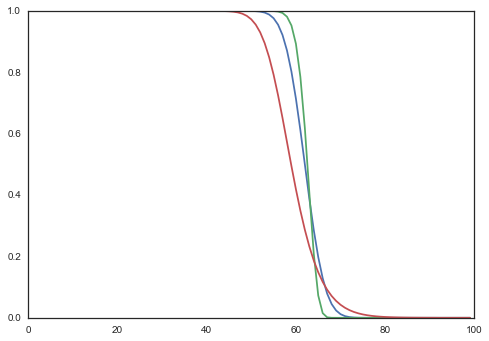

In [243]:
fig, ax = plt.subplots()
ax.plot(xs, w(q(xs, mu, sigma), 1, 1))
ax.plot(xs, w(q(xs, mu, sigma), 1, 2))
ax.plot(xs, w(q(xs, mu, sigma), 1.5, .5))
plt.show()

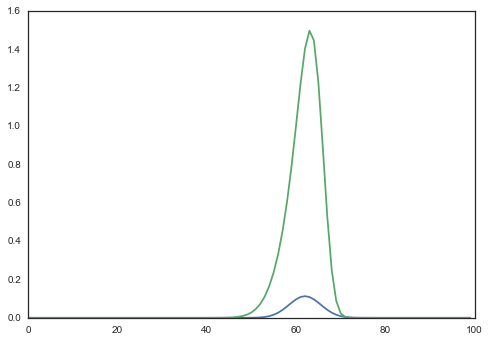

In [244]:
#print q(xs, mu, sigma)
omega = wprime(q(xs, mu, sigma), 1, 1.5)
plt.plot(xs, norm.pdf(xs, mu, sigma))
plt.plot(omega)

/Users/markant/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log


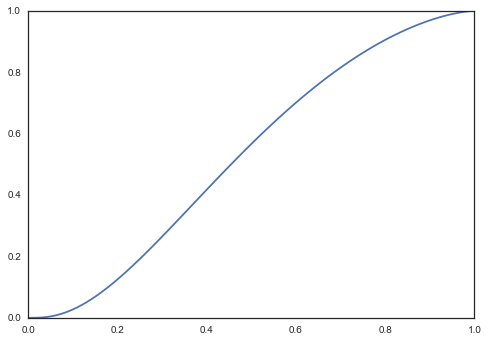

In [312]:
ps = np.arange(0, 1.01, .01)
plt.plot(ps, w(ps, delta, gamma))
plt.show()

In [315]:
delta = 1
gamma = 1.54

def pr(x):
    return (1/np.sqrt(2*np.pi*(sigma2)))*np.exp(-((x - mu)**2)/(2*sigma2))

def q(x): 
    return 1 - norm.cdf(x, mu, sd)

def wprime(q):
    if q==0:
        return 0
    else:
        return ((delta*gamma)/q) * np.exp(-delta*(-np.log(q))**(gamma)) * ((-np.log(q))**(gamma-1))

def decision_weight(x, C=1):
    return (1/C) * pr(x) * wprime(q(x))

def sev(x, C):
    return decision_weight(x, C=C) * (x)

def svar(x, C):
    return decision_weight(x, C=C) * (x**2)

#print integrate.quad(lambda x: pr(x), 0, np.inf)[0]
#print integrate.quad(lambda q: wprime(q), 0, 1)[0]
C = integrate.quad(lambda x: decision_weight(x), 0, np.inf)[0]
print C

ev = integrate.quad(lambda x: sev(x, C=C), 0, np.inf)[0]
evar = integrate.quad(lambda x: svar(x, C=C), 0, np.inf)[0] - ev**2
print ev, evar

6.23173744325e-09
11680815832.7 -1.36441457786e+20


In [314]:
wp_a = np.array([wprime(q(x)) for x in xs])

In [316]:
wp_b = np.array([wprime(q(x)) for x in xs])

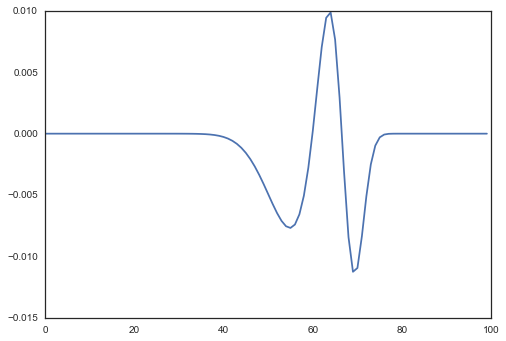

In [320]:
plt.plot(wp_b - wp_a)

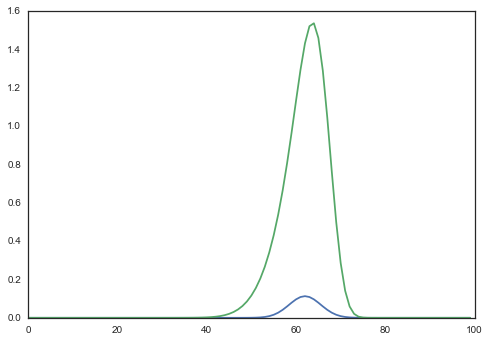

In [308]:
wp = np.array([wprime(q(x)) for x in xs])
p = np.array([pr(x) for x in xs])
#dw = np.array([decision_weight(x, C=C) for x in xs])
plt.plot(xs, p)
#plt.plot(xs, dw)
plt.plot(xs, wp)

/Users/markant/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in divide
/Users/markant/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log
/Users/markant/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in multiply


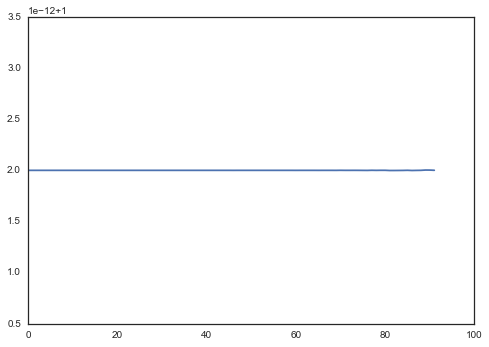

In [186]:
fig, ax = plt.subplots()
ax.plot(xs, wprime(q(xs, mu, sigma), 1, 1))
plt.show()

In [10]:
R = np.array([[10., .5],
              [30., .5]])
S = np.zeros(R.shape)
S[0,:] = [expected_value(R), 1.]
options = np.array([S, R])

R = np.array([[-10, .5],
              [-30., .5]])
S = np.zeros(R.shape)
S[0,:] = [expected_value(R), 1.]
options_loss = np.array([S, R])

In [15]:
pars = {'theta': 4,
        'p_stay': 0.3,
        'pow_gain': .5,
        'w_loss': 10.}

m = CHASEModel(drift='cpt', startdist='indifferent')

In [16]:
r_gain = m(options, pars)
r_loss = m(options_loss, pars)

[[ 1.   0. ]
 [ 0.5  0.5]]
[[ 4.47213595  0.        ]
 [ 3.16227766  5.47722558]]
[[ 1.   0. ]
 [ 0.5  0.5]]
[[-44.72135955   0.        ]
 [-31.6227766  -54.77225575]]


In [17]:
m.drift(options, pars)

[[ 1.   0. ]
 [ 0.5  0.5]]
[[ 4.47213595  0.        ]
 [ 3.16227766  5.47722558]]


-0.065826248793698042

In [18]:
m.drift(options_loss, pars)

[[ 1.   0. ]
 [ 0.5  0.5]]
[[-44.72135955   0.        ]
 [-31.6227766  -54.77225575]]


0.065826248793697792

In [216]:
print 'gain'
print r_gain['p_resp']
print r_gain['exp_samplesize']

print 'loss'
print r_loss['p_resp']
print r_loss['exp_samplesize']

gain
[ 0.64471614  0.35528386]
[[ 22.2450168  22.2450168]]
loss
[ 0.35528386  0.64471614]
[[ 22.2450168  22.2450168]]


In [191]:
pars = {'theta': 10,
        'p_stay': 0.,
        'prelec_gamma': 1.5}

m = CHASEModel(drift='cpt', startdist='indifferent')

In [192]:
X = np.array([10, 20, 30, 40, 50, 60, 70])

In [193]:
p_flat = np.ones(len(X))/float(len(X))

In [194]:
w_peaked = np.array([1, 1, 10, 20, 10, 1, 1])
p_peaked = w_peaked/float(np.sum(w_peaked))

In [195]:
w_extreme = np.array([20, 1, 1, 1, 1, 1, 1])
p_extreme = w_extreme/float(sum(w_extreme))

In [196]:
R = np.transpose((X, p_flat))
S = np.zeros(R.shape)
S[0,:] = [expected_value(R), 1.]
options = np.array([S, R])
print map(expected_value, options)
print m.drift(options, pars)
print m(options, pars)['p_resp']

[39.999999999999993, 39.999999999999993]
0.0590785543359
[ 0.23452244  0.76547756]


In [197]:
R = np.transpose((X, p_peaked))
S = np.zeros(R.shape)
S[0,:] = [expected_value(R), 1.]
options = np.array([S, R])
print map(expected_value, options)
print m.drift(options, pars)
print m(options, pars)['p_resp']

[40.000000000000007, 40.000000000000007]
0.040476843023
[ 0.30789488  0.69210512]


In [198]:
R = np.transpose((X + 22, p_extreme))
S = np.zeros(R.shape)
S[0,:] = [expected_value(R), 1.]
options = np.array([S, R])
#print options
print map(expected_value, options)
print m.drift(options, pars)
print m(options, pars)['p_resp']

[40.07692307692308, 40.07692307692308]
-0.172876126195
[ 0.97047642  0.02952358]


# Problem sets

In [505]:
int_high = np.array([10, 30, 60, 100])

M = 10
problems_rare = []
for i in range(M):
    low = np.random.random() * 50
    highs = low + int_high + np.random.random(4) * 10
    
    p_low = [.1, .06, .03, .01]
    
    R = [[low, .8]]
    for h, p in zip(highs, p_low):
        R.append([h, p])
    R = np.array(R)

    S = [[expected_value(R) - 1, 1.]]
    for h in highs:
        S.append([0., 0.])
    S = np.array(S)
    
    problems_rare.append(np.array([S, R]))
    print m.drift(problems_rare[-1], pars)

0.0295766559171
0.0294077445669
0.0299746652591
0.0313043649924
0.0292495078444
0.0284616594684
0.0288816872597
0.0289959517387
0.0308364451204
0.028547372005


In [ ]:
D = [m.drift(prob, pars) for prob in problems_rare]
print D
print np.mean(D)

# Different thresholds

### Low threshold

In [555]:
problems = problems_rare

cols = ['subject', 'problem', 'group', 'choice', 'samplesize']
pars = {'theta': 1,
        'p_stay': 0.,
        'N': 10000}

# create the model with EV-based drift
m = CHASEModel(drift='ev', startdist='indifferent')

arr = []
for j in range(M):
    traj = m.sample_trajectories(problems[j], pars)
    for i, tr in enumerate(traj):
        arr.append([i, j, 0, tr['choice'], tr['samplesize']])
df = pd.DataFrame(arr, columns=cols)

# this is the choice proportion across entire simulated 
# dataset, which is slightly in favor of the H option
df.groupby('problem').agg(np.mean)['choice']

problem
0    0.5129
1    0.5119
2    0.5088
3    0.5231
4    0.5113
5    0.5153
6    0.5138
7    0.5168
8    0.5189
9    0.5254
Name: choice, dtype: float64

In [527]:
# can fit CPT to the choice proportion for this 
# single problem
fitting = {'s': [0, np.inf, 1.],
           'prelec_gamma': [0, np.inf, 1.]}
cpt.fit_msd(problems_rare, df, 'cptfit_problems_rare', fixed={}, fitting=fitting)

cptfit_problems_rare(prelec_gamma,s|)


,iteration,success,k,N,msd,prelec_gamma,s
0,0,True,2,100000,0.000006,1.069005,0.447


In [528]:
# can fit CPT to the choice proportion for this 
# single problem
fitting = {'prelec_gamma': [0, 5, 1.],}
cpt.fit_msd(problems_rare, df, 'cptfit_problems_rare', fixed={}, fitting=fitting)

cptfit_problems_rare(prelec_gamma|)


,iteration,success,k,N,msd,prelec_gamma
0,0,True,1,100000,0.000018,1.076074


In [517]:
# generate simulated datasets and fit CPT to get
# distribution of gamma parameters

N = 10
SIM_ID = 'sim1_recovery_CHASE_N=%s' % N
N_FIT_ITER = 5
OUTDIR = 'sim1_recovery_CHASE'

arr_th1 = []
for iteration in range(10):
    
    # sample dataset
    ds = df.groupby('problem').apply(lambda d: d.iloc[np.random.randint(d.shape[0], size=N)]).reset_index(0, drop=True)
    
    # fit with CPT
    r = cpt.fit_msd(problems_rare, ds, 'cptfit_problems_rare_%s' % iteration, fixed={}, fitting=fitting)
    arr_th1.append(r[['prelec_gamma', 's']].values[0])
    
    # fit with CHASE
    m = CHASEModel(drift='cpt',
                   startdist='softmax')

    fitting_CHASE = {'theta': [1, 10],
                     'p_stay': [0, 1],
                     'tau': [0, np.inf, 1.],
                     'prelec_gamma': [0, 5, 1.],}

    results = fit_mlh(m, problems_rare, ds, 
                      SIM_ID, {}, fitting_CHASE, niter=N_FIT_ITER, outdir=OUTDIR)

cptfit_problems_rare_0(prelec_gamma,s|)
cptfit_problems_rare_1(prelec_gamma,s|)
cptfit_problems_rare_2(prelec_gamma,s|)
cptfit_problems_rare_3(prelec_gamma,s|)
cptfit_problems_rare_4(prelec_gamma,s|)
cptfit_problems_rare_5(prelec_gamma,s|)
cptfit_problems_rare_6(prelec_gamma,s|)
cptfit_problems_rare_7(prelec_gamma,s|)
cptfit_problems_rare_8(prelec_gamma,s|)
cptfit_problems_rare_9(prelec_gamma,s|)


In [566]:
# generate simulated datasets and fit CPT to get
# distribution of gamma parameters
N = 20
N_FIT_ITER = 3
OUTDIR = 'sim1_recovery_CHASE'


arr_th1 = []
for iteration in range(10):
    
    # sample dataset
    ds = df.groupby('problem').apply(lambda d: d.iloc[np.random.randint(d.shape[0], size=N)]).reset_index(0, drop=True)
    
    # fit CPT
    r = cpt.fit_msd(problems_rare, ds, 'cptfit_problems_rare_%s' % iteration, fixed={}, fitting=fitting)
    arr_th1.append(r['prelec_gamma'].values[0])
    
    # fit CHASE
    m = CHASEModel(drift='cpt',
                   startdist='indifferent')
    SIM_ID = 'sim1_recovery_CHASE_N=%s_theta=1_iter=%s' % (N, iteration)

    fitting_CHASE = {'theta': [1, 3],
                     'p_stay': [0, 1],
                     'prelec_gamma': [0, 5, 1.],}

    results = fit_mlh(m, problems_rare, ds, 
                      SIM_ID, {}, fitting_CHASE, niter=N_FIT_ITER, outdir=OUTDIR)
    print results.sort('nllh')

cptfit_problems_rare_0(prelec_gamma|)
sim1_recovery_CHASE_N=20_theta=1_iter=0(p_stay,prelec_gamma,theta|)
0/9
1/9
2/9
3/9
4/9
5/9
6/9
7/9
8/9
   iteration success         nllh  k    N          bic  theta        p_stay  \
0          0    True   138.263364  3  200   292.421679      1  1.319775e-10   
3          1    True   138.263364  3  200   292.421679      1  2.550535e-10   
6          2    True   138.263364  3  200   292.421679      1  4.309036e-10   
1          0    True  4743.435206  3  200  9502.765363      2  6.860071e-01   
4          1    True  4743.435206  3  200  9502.765363      2  7.608090e-01   
7          2    True  4743.435206  3  200  9502.765363      2  2.823140e-01   
2          0    True  4743.438299  3  200  9502.771549      3  7.552063e-01   
5          1    True  4743.438299  3  200  9502.771549      3  5.207595e-01   
8          2    True  4743.438299  3  200  9502.771549      3  6.189121e-01   

   prelec_gamma  
0      0.907026  
3      0.907110  
6      0.9069

In [567]:
arr = []
N = 20
for iteration in range(10):
    SIM_ID = 'sim1_recovery_CHASE_N=%s_theta=1_iter=%s' % (N, iteration)
    best = best_result(SIM_ID, {}, fitting_CHASE, OUTDIR)
    arr.append([j, N, iteration, best['theta'], best['p_stay'], best['prelec_gamma']])
fitdf = pd.DataFrame(arr, columns=['dataset', 'N', 'iteration', 'bf_theta', 'bf_p_stay', 'bf_gamma'])

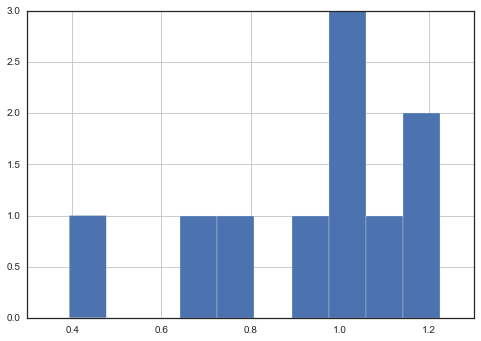

In [574]:
fitdf['bf_gamma'].hist()

### High threshold

In [582]:
pars = {'theta': 20,
        'p_stay': 0.,
        'N': 10000}

# create the model with EV-based drift
m = CHASEModel(drift='ev', startdist='indifferent')

arr = []
for j in range(M):
    traj = m.sample_trajectories(problems[j], pars)
    for i, tr in enumerate(traj):
        arr.append([i, j, 0, tr['choice'], tr['samplesize']])
df = pd.DataFrame(arr, columns=cols)

# this is the choice proportion across entire simulated 
# dataset, which is slightly in favor of the H option
df.groupby('problem').agg(np.mean)['choice']

problem
0    0.7557
1    0.7725
2    0.7714
3    0.7705
4    0.7574
5    0.7588
6    0.7604
7    0.7650
8    0.7753
9    0.7522
Name: choice, dtype: float64

In [ ]:
# generate simulated datasets and fit CPT to get
# distribution of gamma parameters
N = 10000
arr_th20 = []
for iteration in range(100):
    
    # sample dataset
    ds = df.groupby('problem').apply(lambda d: d.iloc[np.random.randint(d.shape[0], size=N)]).reset_index(0, drop=True)
    
    # fit CPT
    r = cpt.fit_msd(problems_rare, ds, 'cptfit_problems_rare_%s' % iteration, fixed={}, fitting=fitting)
    arr_th20.append(r['prelec_gamma'].values[0])
    
    # fit CHASE
    m = CHASEModel(drift='cpt',
                   startdist='indifferent')
    SIM_ID = 'sim1_recovery_CHASE_N=%s_theta=20_iter=%s' % (N, iteration)

    fitting_CHASE = {'theta': [18, 22],
                     'p_stay': [0, 1],
                     'prelec_gamma': [0, 5, 1.],}

    results = fit_mlh(m, problems_rare, ds, 
                      SIM_ID, {}, fitting_CHASE, niter=N_FIT_ITER, outdir=OUTDIR)
    print results.sort('nllh')

cptfit_problems_rare_0(prelec_gamma|)
sim1_recovery_CHASE_N=10000_theta=20_iter=0(p_stay,prelec_gamma,theta|)

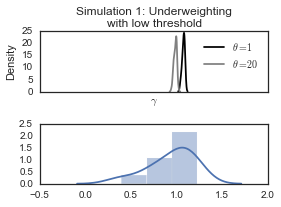

In [578]:
fig, ax = plt.subplots(2, 1, figsize=(4,3), sharex=True)
axi = ax[0]
sns.distplot(arr_th1, hist=False, rug=False, label=r'$\theta=1$', ax=axi, color='black')
sns.distplot(arr_th20, hist=False, rug=False, label=r'$\theta=20$', ax=axi, color='gray')
axi.set_xlabel(r'$\gamma$')
axi.set_ylabel('Density')
axi.set_title('Simulation 1: Underweighting\nwith low threshold')

axi = ax[1]
sns.distplot(fitdf['bf_gamma'].values)

plt.tight_layout()
plt.show()
fig.savefig(FIGDEST+'sim1_cpt.pdf', bbox_inches='tight')

# Different start point variability

In [546]:
problems = problems_rare
theta = 20

cols = ['subject', 'problem', 'group', 'choice', 'samplesize']
pars = {'theta': theta,
        'p_stay': 0.,
        'N': 10000}

# create the model with EV-based drift
m = CHASEModel(drift='ev', startdist='uniform')

arr = []
for j in range(M):
    traj = m.sample_trajectories(problems[j], pars)
    for i, tr in enumerate(traj):
        arr.append([i, j, 0, tr['choice'], tr['samplesize']])
df = pd.DataFrame(arr, columns=cols)

# this is the choice proportion across entire simulated 
# dataset, which is slightly in favor of the H option
df.groupby('problem').agg(np.mean)['choice']

problem
0    0.6877
1    0.6800
2    0.6909
3    0.6959
4    0.6889
5    0.6855
6    0.6870
7    0.6891
8    0.6855
9    0.6766
Name: choice, dtype: float64

In [458]:
# can fit CPT to the choice proportion for this 
# single problem
fitting = {'prelec_gamma': [0, 5, 1.],}
cpt.fit_msd(problems_rare, df, 'cptfit_problems_rare', fixed={}, fitting=fitting)

cptfit_problems_rare(prelec_gamma|)


,iteration,success,k,N,msd,prelec_gamma
0,0,True,1,100000,0.000133,1.043262


In [459]:
# generate simulated datasets and fit CPT to get
# distribution of gamma parameters
N = 20
arr_tau_low = []
for iteration in range(10):
    ds = df.groupby('problem').apply(lambda d: d.iloc[np.random.randint(d.shape[0], size=N)]).reset_index(0, drop=True)
    r = cpt.fit_msd(problems_rare, ds, 'cptfit_problems_rare_%s' % iteration, fixed={}, fitting=fitting)
    arr_tau_low.append(r['prelec_gamma'].values[0])

cptfit_problems_rare_0(prelec_gamma|)
cptfit_problems_rare_1(prelec_gamma|)
cptfit_problems_rare_2(prelec_gamma|)
cptfit_problems_rare_3(prelec_gamma|)
cptfit_problems_rare_4(prelec_gamma|)
cptfit_problems_rare_5(prelec_gamma|)
cptfit_problems_rare_6(prelec_gamma|)
cptfit_problems_rare_7(prelec_gamma|)
cptfit_problems_rare_8(prelec_gamma|)
cptfit_problems_rare_9(prelec_gamma|)


In [460]:
pars = {'theta': theta,
        'p_stay': 0.,
        'N': 10000}

# create the model with EV-based drift
m = CHASEModel(drift='ev', startdist='indifferent')

arr = []
for j in range(M):
    traj = m.sample_trajectories(problems[j], pars)
    for i, tr in enumerate(traj):
        arr.append([i, j, 0, tr['choice'], tr['samplesize']])
df = pd.DataFrame(arr, columns=cols)

# this is the choice proportion across entire simulated 
# dataset, which is slightly in favor of the H option
df.groupby('problem').agg(np.mean)['choice']

problem
0    0.6449
1    0.6451
2    0.5915
3    0.6242
4    0.5966
5    0.5945
6    0.6391
7    0.6424
8    0.6032
9    0.6108
Name: choice, dtype: float64

In [461]:
# generate simulated datasets and fit CPT to get
# distribution of gamma parameters
N = 20
arr_tau_high = []
for iteration in range(10):
    ds = df.groupby('problem').apply(lambda d: d.iloc[np.random.randint(d.shape[0], size=N)]).reset_index(0, drop=True)
    r = cpt.fit_msd(problems_rare, ds, 'cptfit_problems_rare_%s' % iteration, fixed={}, fitting=fitting)
    arr_tau_high.append(r['prelec_gamma'].values[0])

cptfit_problems_rare_0(prelec_gamma|)
cptfit_problems_rare_1(prelec_gamma|)
cptfit_problems_rare_2(prelec_gamma|)
cptfit_problems_rare_3(prelec_gamma|)
cptfit_problems_rare_4(prelec_gamma|)
cptfit_problems_rare_5(prelec_gamma|)
cptfit_problems_rare_6(prelec_gamma|)
cptfit_problems_rare_7(prelec_gamma|)
cptfit_problems_rare_8(prelec_gamma|)
cptfit_problems_rare_9(prelec_gamma|)


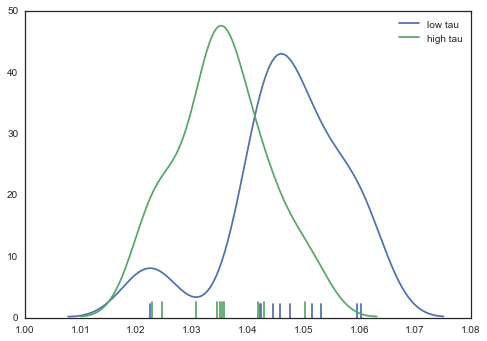

In [462]:
sns.distplot(arr_tau_low, hist=False, rug=False, label='low tau')
sns.distplot(arr_tau_high, hist=False, rug=True, label='high tau')
plt.show()

### Generate with CHASE and fit with CPT

Begin by generating a dataset using the CHASE model.

In [330]:
options = options3

In [345]:
cols = ['subject', 'problem', 'group', 'choice', 'samplesize']
pars = {'theta': 1,
        'tau': 10.,
        'p_stay': 0.,
        'N': 10000}

# create the model with EV-based drift
m = CHASEModel(drift='ev', startdist='softmax')
traj = m.sample_trajectories(options, pars)
arr = [[i, 0, 0, tr['choice'], tr['samplesize']] for i, tr in enumerate(traj)]
df = pd.DataFrame(arr, columns=cols)

# this is the choice proportion across entire simulated 
# dataset, which is slightly in favor of the H option
print df.choice.mean()

0.5115


In [344]:
# can fit CPT to the choice proportion for this 
# single problem
fitting = {'prelec_gamma': [0, 5, 1.],}
cpt.fit_msd([options], df, 'cptfit_options3', fixed={}, fitting=fitting)

cptfit_options3(prelec_gamma|)


,iteration,success,k,N,msd,prelec_gamma
0,0,True,1,10000,5.575120e-09,1.048047


In [311]:
N = 20
arr_th1 = []
for iteration in range(100):
    ds = df.iloc[np.random.randint(df.shape[0], size=N)]

    r = cpt.fit_msd([options3], ds, 'cptfit_options1_%s' % iteration, fixed={}, fitting=fitting)
    arr_th1.append(r['prelec_gamma'].values[0])

cptfit_options1_0(prelec_elevation,prelec_gamma,s|)
cptfit_options1_1(prelec_elevation,prelec_gamma,s|)
cptfit_options1_2(prelec_elevation,prelec_gamma,s|)
cptfit_options1_3(prelec_elevation,prelec_gamma,s|)
cptfit_options1_4(prelec_elevation,prelec_gamma,s|)
cptfit_options1_5(prelec_elevation,prelec_gamma,s|)
cptfit_options1_6(prelec_elevation,prelec_gamma,s|)
cptfit_options1_7(prelec_elevation,prelec_gamma,s|)
cptfit_options1_8(prelec_elevation,prelec_gamma,s|)
cptfit_options1_9(prelec_elevation,prelec_gamma,s|)
cptfit_options1_10(prelec_elevation,prelec_gamma,s|)
cptfit_options1_11(prelec_elevation,prelec_gamma,s|)
cptfit_options1_12(prelec_elevation,prelec_gamma,s|)
cptfit_options1_13(prelec_elevation,prelec_gamma,s|)
cptfit_options1_14(prelec_elevation,prelec_gamma,s|)
cptfit_options1_15(prelec_elevation,prelec_gamma,s|)
cptfit_options1_16(prelec_elevation,prelec_gamma,s|)
cptfit_options1_17(prelec_elevation,prelec_gamma,s|)
cptfit_options1_18(prelec_elevation,prelec_gamma,s|)
cpt

In [254]:
cols = ['subject', 'problem', 'group', 'choice', 'samplesize']
pars = {'theta': 10,
        'p_stay': 0.,
        'N': 10000}

# create the model with EV-based drift
m = CHASEModel(drift='ev', startdist='indifferent')
traj = m.sample_trajectories(options, pars)
arr = [[i, 0, 0, tr['choice'], tr['samplesize']] for i, tr in enumerate(traj)]
df = pd.DataFrame(arr, columns=cols)

# this is the choice proportion across entire simulated 
# dataset, which is slightly in favor of the H option
print df.choice.mean()

0.5975


In [255]:
N = 100
arr_th10 = []
for iteration in range(1000):
    ds = df.iloc[np.random.randint(df.shape[0], size=N)]

    r = cpt.fit_msd([options3], ds, 'cptfit_options1_%s' % iteration, fixed={}, fitting=fitting)
    arr_th10.append(r['prelec_gamma'].values[0])

cptfit_options1_0(prelec_gamma|)
cptfit_options1_1(prelec_gamma|)
cptfit_options1_2(prelec_gamma|)
cptfit_options1_3(prelec_gamma|)
cptfit_options1_4(prelec_gamma|)
cptfit_options1_5(prelec_gamma|)
cptfit_options1_6(prelec_gamma|)
cptfit_options1_7(prelec_gamma|)
cptfit_options1_8(prelec_gamma|)
cptfit_options1_9(prelec_gamma|)
cptfit_options1_10(prelec_gamma|)
cptfit_options1_11(prelec_gamma|)
cptfit_options1_12(prelec_gamma|)
cptfit_options1_13(prelec_gamma|)
cptfit_options1_14(prelec_gamma|)
cptfit_options1_15(prelec_gamma|)
cptfit_options1_16(prelec_gamma|)
cptfit_options1_17(prelec_gamma|)
cptfit_options1_18(prelec_gamma|)
cptfit_options1_19(prelec_gamma|)
cptfit_options1_20(prelec_gamma|)
cptfit_options1_21(prelec_gamma|)
cptfit_options1_22(prelec_gamma|)
cptfit_options1_23(prelec_gamma|)
cptfit_options1_24(prelec_gamma|)
cptfit_options1_25(prelec_gamma|)
cptfit_options1_26(prelec_gamma|)
cptfit_options1_27(prelec_gamma|)
cptfit_options1_28(prelec_gamma|)
cptfit_options1_29(prele

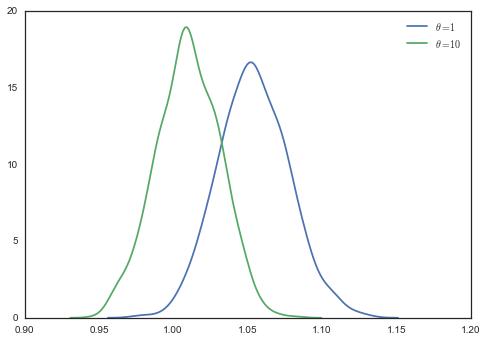

In [262]:
sns.distplot(arr_th1, hist=False, rug=False, label=r'$\theta=1$')
sns.distplot(arr_th10, hist=False, rug=False, label=r'$\theta=10$')
plt.show()

### Fit CHASE

In [ ]:
for N in N_SET:
    print j, N
    for iteration in range(N_ITER):

        SIM_ID = 'recovery_dataset%s_N=%s_iter=%s' % (j, N, iteration)

        # sample a dataset of size N per problem
        ds = data.groupby('problem').apply(lambda d: d.iloc[np.random.randint(d.shape[0], size=N)]).reset_index(0, drop=True)

        # initialize the model
        m = CHASEModel(drift='cpt',
                       startdist='softmax')

        # fit
        results = fit_mlh(m, problems, ds, 
                          SIM_ID, FIXED, fitting, niter=N_FIT_ITER, outdir=OUTDIR)

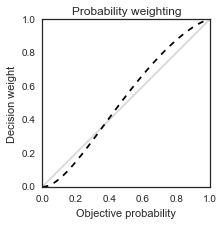

In [465]:
def prelec(p, prelec_elevation, prelec_gamma):
    return np.exp(-prelec_elevation * ((-np.log(p)) ** prelec_gamma))

p = np.arange(0, 1, .01)
fig, axi = plt.subplots(figsize=(3,3))
axi.plot([0, 1], [0, 1], color='gray', alpha=.3)
axi.plot(p, prelec(p, 1., 1.35), '--', color='black')
axi.set_title('Probability weighting')
axi.set_xlabel('Objective probability')
axi.set_ylabel('Decision weight')
plt.show()